In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Apartments.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df.columns = ['Price', 'Number of Rooms', 'Square Footage', 'Heating', 'Floor', 'Type of Apartment', 'State', 'Furnished', 'Lift', 'Year Built', 'Year Renovated', 
              'Number of Balconies', 'Number of Bathrooms', 'Basement', 'Parking', 'Orientation', 'Address']

In [4]:
df.head()

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
0,1.400€,3,51 m²,Централно,6 кат,Во Зграда,Во градба,Празен,Да,2023.0,NaN,1 Балкон,1,Не,1 Паркинг,Исток,Vangel Todorovski
1,1€,3,79 m²,Струја,1 кат,Во Зграда,Нов,Празен,Не,2023.0,NaN,2 Балкони,2,Да,1 Паркинг,Југоисток,NaN
2,1.150€,4,85 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Не,2011.0,NaN,1 Балкон,2,Да,1 Паркинг,Југоисток,Bozidar Adzija
3,500€,3,60 m²,Централно,1 кат,Во Зграда,Нов,Празен,Не,NaN,NaN,1 Балкон,1,Не,Нема,Североисток,CENTAR
4,300€,2,57 m²,Централно,2 кат,Во Зграда,Нов,Луксузен,Да,0.0,0.0,1 Тераса,1,Не,Нема,Југоисток,Xxx


Cleaning the data/Dealing with missing data

Removing duplicate values.

In [5]:
df[df.duplicated()]

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
62,1.000МКД,"1,5",30 m²,Централно,1 кат,Во Зграда,Нов,Наместен,Да,2021.0,NaN,1 Тераса,1,Не,1 Паркинг,Југ,Методија Шаторов-Шарло
127,120.000€,4,101 m²,Централно,3 кат,Во Зграда,Стар,Полу наместен,Да,NaN,NaN,1 Балкон,1,Да,2 Паркинг места,Југоисток,Bitpazar
218,1.200МКД,"1,5",50 m²,Струја,2 кат,Во Зграда,Реновиран,Луксузен,Не,NaN,NaN,2 Балкони,1,Да,1 Паркинг,Југ,"Ulica Makedonija, kaj bikot"
225,350€,1,62 m²,Струја,8 кат,Во Зграда,Нов,Наместен,Да,2022.0,NaN,1 Балкон,1,Не,1 Гаража,Исток,Ul.Hristo Smrnenski br23 st br 32
256,1€,3,70 m²,Централно,1 кат,Во Зграда,Во градба,Празен,Да,2023.0,NaN,1 Балкон,2,Не,1 Паркинг,Југ,Дане Крапчев 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,1€,3,75 m²,Централно,2 кат,Во Зграда,Реновиран,Наместен,Да,NaN,NaN,1 Балкон,1,Не,1 Паркинг,Југ,NaN
6402,450€,3,74 m²,Струја,2 кат,Во Зграда,Нов,Луксузен,Да,NaN,NaN,1 Балкон,2,Да,1 Паркинг,Југ,ulica kozle
6403,1€,4,70 m²,Нема,3 кат,Во Зграда,Стар,Празен,Не,1961.0,NaN,2 Балкони,1,Да,1 Паркинг,Југ,Васил Ѓоргов 23а
6404,350€,2,50 m²,Струја,Приземје,Во куќа,Нов,Наместен,Да,NaN,NaN,1 Балкон,1,Не,1 Паркинг,Југ,Ул.Фредерик Шопен број 10


In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

Price                   225
Number of Rooms           4
Square Footage           13
Heating                   4
Floor                     0
Type of Apartment         5
State                     5
Furnished                 5
Lift                      1
Year Built             4153
Year Renovated         4951
Number of Balconies       5
Number of Bathrooms       5
Basement                  1
Parking                   5
Orientation               5
Address                1744
dtype: int64

<AxesSubplot: >

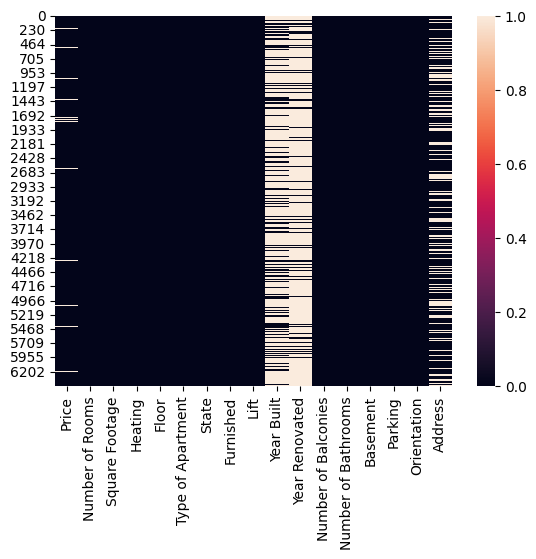

In [8]:
sns.heatmap(df.isnull())

We can remove the missing Price rows.

In [9]:
df = df.dropna(subset = ['Price'])

In [10]:
df.isnull().sum()

Price                     0
Number of Rooms           4
Square Footage            9
Heating                   4
Floor                     0
Type of Apartment         5
State                     5
Furnished                 5
Lift                      1
Year Built             3999
Year Renovated         4762
Number of Balconies       5
Number of Bathrooms       5
Basement                  1
Parking                   5
Orientation               5
Address                1691
dtype: int64

In [11]:
df.head()

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
0,1.400€,3,51 m²,Централно,6 кат,Во Зграда,Во градба,Празен,Да,2023.0,NaN,1 Балкон,1,Не,1 Паркинг,Исток,Vangel Todorovski
1,1€,3,79 m²,Струја,1 кат,Во Зграда,Нов,Празен,Не,2023.0,NaN,2 Балкони,2,Да,1 Паркинг,Југоисток,NaN
2,1.150€,4,85 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Не,2011.0,NaN,1 Балкон,2,Да,1 Паркинг,Југоисток,Bozidar Adzija
3,500€,3,60 m²,Централно,1 кат,Во Зграда,Нов,Празен,Не,NaN,NaN,1 Балкон,1,Не,Нема,Североисток,CENTAR
4,300€,2,57 m²,Централно,2 кат,Во Зграда,Нов,Луксузен,Да,0.0,0.0,1 Тераса,1,Не,Нема,Југоисток,Xxx


Because the missing values of some of the variables are so low, we'll go with a case by case analysis and fill them in.

In [12]:
df[df['Number of Rooms'].isnull()]

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
2643,10.000€,NaN,NaN,NaN,Приземје,NaN,NaN,NaN,Не,NaN,NaN,NaN,NaN,Не,NaN,NaN,NaN
4496,250€,NaN,NaN,NaN,Приземје,NaN,NaN,NaN,Не,NaN,NaN,NaN,NaN,Не,NaN,NaN,NaN
5343,300€,NaN,NaN,NaN,Приземје,NaN,NaN,NaN,Не,NaN,NaN,NaN,NaN,Не,NaN,NaN,NaN
5702,200€,NaN,NaN,NaN,Приземје,NaN,NaN,NaN,Не,NaN,NaN,NaN,NaN,Не,NaN,NaN,NaN


Looks like these are rows that have lots of missing values, we will remove them, because we would have to make lots of assumptions about them if we were to use them in our model.

In [13]:
df = df.dropna(subset = ['Square Footage'])

In [14]:
df[df['Type of Apartment'].isnull()]

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
453,20€,1,33 m²,Централно,3 кат,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna(subset = ['Type of Apartment'])

In [16]:
df.isnull().sum()

Price                     0
Number of Rooms           0
Square Footage            0
Heating                   0
Floor                     0
Type of Apartment         0
State                     0
Furnished                 0
Lift                      0
Year Built             3992
Year Renovated         4754
Number of Balconies       0
Number of Bathrooms       0
Basement                  0
Parking                   0
Orientation               0
Address                1684
dtype: int64

In [17]:
df[df['Year Built'] < 1900]['Year Built']

4          0.0
17        20.0
231        1.0
414        1.0
551       80.0
581     1800.0
590       95.0
1020      91.0
1231    1111.0
1268       0.0
1271      65.0
1604      71.0
1614      91.0
1696       1.0
2267      46.0
2342       1.0
3606       1.0
4739      85.0
5003       0.0
5029    1886.0
5307       1.0
5664       0.0
5791       1.0
6064      42.0
6068      87.0
Name: Year Built, dtype: float64

It wouldn't make any sense for the apartments to be built in the year 1900 or lower, so we will remove these values.

In [18]:
df.loc[df['Year Built'] < 1900, 'Year Built'] = np.nan

In [19]:
df['Year Built'].value_counts()

2022.0    203
2020.0    167
2018.0    105
2023.0    103
2021.0    102
         ... 
1967.0      1
1977.0      1
1938.0      1
1976.0      1
1937.0      1
Name: Year Built, Length: 67, dtype: int64

In [20]:
df[df['Year Built'].isnull() == False].describe()['Year Built']

count     1620.000000
mean      2015.025309
std        199.187696
min       1937.000000
25%       2005.000000
50%       2017.000000
75%       2021.000000
max      10000.000000
Name: Year Built, dtype: float64

In [21]:
df[df['Year Built'] > 2023]

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
2202,100€,1,42 m²,Струја,Приземје,Во Зграда,Стар,Празен,Не,2222.0,22222.0,1 Балкон,1,Да,1 Паркинг,Југ,Dame gruev
2627,250€,3,80 m²,Централно,1 кат,Во Зграда,Реновиран,Наместен,Да,10000.0,20000.0,Тераса + 1 Балкон,2,Да,1 Паркинг,Североисток,Ul. Jane lukrovski
4189,300€,"3,5",72 m²,Централно,2 кат,Во Зграда,Реновиран,Празен,Да,2025.0,2050.0,3 Балкони,1,Да,1 Паркинг,Југ,Димитриј Чуповски 24/5


Also it wouldn't make any sense for the years to be over 2023, so we are going to remove these values as well.

In [22]:
df.loc[df['Year Built'] > 2023, 'Year Built'] = np.nan

In [23]:
df.isnull().sum()

Price                     0
Number of Rooms           0
Square Footage            0
Heating                   0
Floor                     0
Type of Apartment         0
State                     0
Furnished                 0
Lift                      0
Year Built             4020
Year Renovated         4754
Number of Balconies       0
Number of Bathrooms       0
Basement                  0
Parking                   0
Orientation               0
Address                1684
dtype: int64

In [24]:
df['Year Built'].describe()

count    1617.000000
mean     2009.952999
std        15.548121
min      1937.000000
25%      2005.000000
50%      2017.000000
75%      2021.000000
max      2023.000000
Name: Year Built, dtype: float64

We need to do the same for year renovated.

In [25]:
df.loc[df['Year Renovated'] < 1900, 'Year Renovated'] = np.nan

In [26]:
df.loc[df['Year Renovated'] > 2023, 'Year Renovated'] = np.nan

Now, we need to decide what to do with the missing YearBuilt and Year Renovated values

In [27]:
df[(df['Year Built'].isnull() == True) & (df['Year Renovated'].isnull() == False)]['Year Renovated'].describe()

count     122.000000
mean     2019.213115
std         4.853608
min      2000.000000
25%      2019.000000
50%      2021.000000
75%      2022.000000
max      2023.000000
Name: Year Renovated, dtype: float64

For the rows that are missing values in Year Built, but are not null in Year Renovated we can assume that they are older apartments.

In [28]:
df['Year Built'].describe()

count    1617.000000
mean     2009.952999
std        15.548121
min      1937.000000
25%      2005.000000
50%      2017.000000
75%      2021.000000
max      2023.000000
Name: Year Built, dtype: float64

<AxesSubplot: xlabel='Year Built', ylabel='Count'>

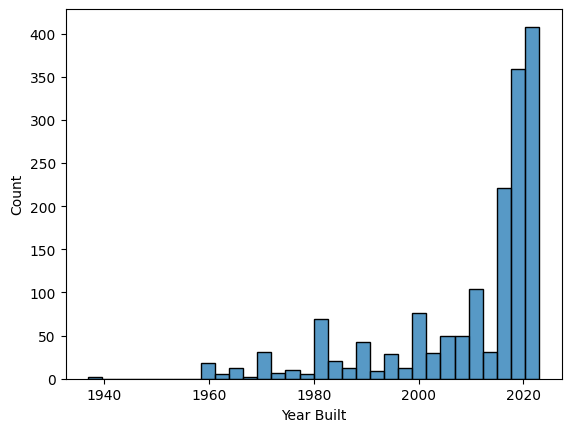

In [29]:
sns.histplot(df['Year Built'])

<AxesSubplot: xlabel='Year Renovated', ylabel='Count'>

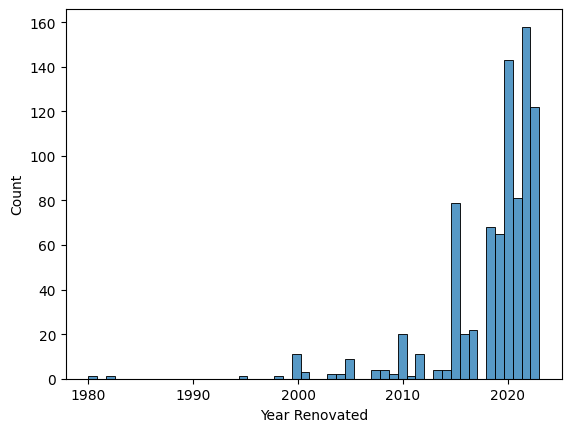

In [30]:
sns.histplot(df['Year Renovated'])

In [31]:
df[(df['Year Built'].isnull() == True) & (df['Year Renovated'].isnull() == False)][['Year Renovated', 'Year Built']]

,Year Renovated,Year Built
18,2018.0,NaN
78,2021.0,NaN
124,2022.0,NaN
207,2022.0,NaN
229,2000.0,NaN
...,...,...
6343,2022.0,NaN
6372,2010.0,NaN
6388,2022.0,NaN
6415,2020.0,NaN


In [32]:
df[(df['Year Built'].isnull() == False) & (df['Year Renovated'].isnull() == False)][['Year Renovated', 'Year Built']]

,Year Renovated,Year Built
5,2009.0,2009.0
8,2023.0,1960.0
9,2015.0,2000.0
12,2018.0,2000.0
19,2020.0,2008.0
...,...,...
6387,2020.0,1985.0
6406,2015.0,1980.0
6412,2015.0,1984.0
6419,2023.0,2023.0


In [33]:
(df[(df['Year Built'].isnull() == False) & (df['Year Renovated'].isnull() == False)]['Year Renovated'] - df[(df['Year Built'].isnull() == False) & (df['Year Renovated'].isnull() == False)]['Year Built']).mean()

15.708507670850768

The average years before an apartment is renovated is 16 years, we will use that to fill in the values for which apartments have the value for Year Renovated, but are missing Year Built.

In [34]:
def fillin(row):
    year_built = row['Year Built']
    year_renovated = row['Year Renovated']
    if pd.isnull(year_built) and not pd.isnull(year_renovated):
        return year_renovated - 16
    else:
        return year_built

In [35]:
df['Year Built'] = df.apply(fillin, axis = 1)

In [36]:
df.isnull().sum()

Price                     0
Number of Rooms           0
Square Footage            0
Heating                   0
Floor                     0
Type of Apartment         0
State                     0
Furnished                 0
Lift                      0
Year Built             3898
Year Renovated         4798
Number of Balconies       0
Number of Bathrooms       0
Basement                  0
Parking                   0
Orientation               0
Address                1684
dtype: int64

We can extract a lot of information about the time the apartments were built using the State column, namely we can fill in the year built with a normal distribution with the mean and standard deviation of the apartments with the corresponding entry in the column State.

In [37]:
df['State'].value_counts()

Нов          3929
Реновиран    1474
Стар          228
Во градба       6
Name: State, dtype: int64

In [38]:
print(df[df['State'] == 'Нов']['Year Built'].isnull().sum())
print(df[df['State'] == 'Реновиран']['Year Built'].isnull().sum())
print(df[df['State'] == 'Стар']['Year Built'].isnull().sum())
print(df[df['State'] == 'Во градба']['Year Built'].isnull().sum())

2751
1001
145
1


In [39]:
print(df[df['State'] == 'Нов']['Year Built'].mean().round())
print(df[df['State'] == 'Реновиран']['Year Built'].mean().round())
print(df[df['State'] == 'Стар']['Year Built'].mean().round())
print(df[df['State'] == 'Во градба']['Year Built'].mean())

2017.0
1994.0
1986.0
2023.0


In [40]:
df.loc[df['State'] == 'Во градба', 'Year Built'] = 2023

In [41]:
print(df[df['State'] == 'Нов']['Year Built'].std().round())
print(df[df['State'] == 'Реновиран']['Year Built'].std().round())
print(df[df['State'] == 'Стар']['Year Built'].std().round())

6.0
15.0
18.0


In [42]:
missingind1 = df[df['State'] == 'Нов'].index
missingind2 = df[df['State'] == 'Реновиран'].index
missingind3 = df[df['State'] == 'Стар'].index
values1 = np.random.normal(2017, 6, len(missingind1))
values2 = np.random.normal(1994, 15, len(missingind2))
values3 = np.random.normal(1986, 18, len(missingind3))

In [43]:
df.loc[missingind1, 'Year Built'] = np.round(np.clip(values1, None, 2023)).astype(int)
df.loc[missingind2, 'Year Built'] = np.round(np.clip(values2, None, 2023)).astype(int)
df.loc[missingind3, 'Year Built'] = np.round(np.clip(values3, None, 2023)).astype(int)

Now, we decide what to do with the Year Renovated column

In [44]:
df.isnull().sum()

Price                     0
Number of Rooms           0
Square Footage            0
Heating                   0
Floor                     0
Type of Apartment         0
State                     0
Furnished                 0
Lift                      0
Year Built                0
Year Renovated         4798
Number of Balconies       0
Number of Bathrooms       0
Basement                  0
Parking                   0
Orientation               0
Address                1684
dtype: int64

In [45]:
df[df['Year Renovated'].isnull()]

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Year Renovated,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
0,1.400€,3,51 m²,Централно,6 кат,Во Зграда,Во градба,Празен,Да,2023.0,NaN,1 Балкон,1,Не,1 Паркинг,Исток,Vangel Todorovski
1,1€,3,79 m²,Струја,1 кат,Во Зграда,Нов,Празен,Не,2019.0,NaN,2 Балкони,2,Да,1 Паркинг,Југоисток,NaN
2,1.150€,4,85 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Не,2016.0,NaN,1 Балкон,2,Да,1 Паркинг,Југоисток,Bozidar Adzija
3,500€,3,60 m²,Централно,1 кат,Во Зграда,Нов,Празен,Не,2012.0,NaN,1 Балкон,1,Не,Нема,Североисток,CENTAR
4,300€,2,57 m²,Централно,2 кат,Во Зграда,Нов,Луксузен,Да,2023.0,NaN,1 Тераса,1,Не,Нема,Југоисток,Xxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400€,4,97 m²,Централно,5 кат,Во Зграда,Нов,Наместен,Да,2011.0,NaN,3 Балкони,1,Не,Нема,Југоисток,NaN
6441,350€,2,45 m²,Централно,7 кат,Во Зграда,Нов,Наместен,Да,2011.0,NaN,1 Балкон,1,Не,1 Паркинг,Исток,Taftalidze 1-gim.Nova
6442,350€,3,75 m²,Струја,1 кат,Во Зграда,Нов,Празен,Да,2014.0,NaN,1 Балкон,1,Не,Нема,Исток,NaN
6443,420€,3,90 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Да,2016.0,NaN,1 Тераса,2,Не,1 Паркинг,Исток,"Centar, 50ta Divizija"


In [46]:
(df[(df['Year Renovated'].notnull()) & (df['State'] == 'Реновиран')]['Year Renovated'] - df[(df['Year Renovated'].notnull()) & (df['State'] == 'Реновиран')]['Year Built']).mean()

25.133016627078383

In [47]:
(df[df['Year Renovated'].notnull()]['Year Renovated']  - df[df['Year Renovated'].notnull()]['Year Built']).mean()

15.169249106078665

In [48]:
(df[df['Year Renovated'].notnull()]['Year Renovated']  - df[df['Year Renovated'].notnull()]['Year Built']).std()

16.65327902903146

The most logical way to fill in our missing rows in column Year Renovated would be to see the average time it takes for an apartment to be renovated. However, the standard deviation of that time is high (17 years), also we already used that to fill in a small number of missing rows of Year Built. And doing this on all 5000+ missing rows would introduce a lot of collinearity in our data, which is not good for some models. So we are going to drop this column. Lets first check though whether there are a lot of apartments that haven't been marked renovated in the State column and that have a value in Year Renovated.

In [49]:
df[(df['Year Renovated'].notnull()) & (df['State'] != 'Реновиран')]['State'].value_counts()

Нов          384
Стар          33
Во градба      1
Name: State, dtype: int64

Fortunetly, there aren't a lot of such values, and for the values that aren't marked as renovated, most are marked as new, which is pretty similar to renovated in terms of apartment quality, so we wouldn't be losing a lot of information. It is safe to drop this column.

In [50]:
df = df.drop(['Year Renovated'],axis = 1)

In [51]:
df

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation,Address
0,1.400€,3,51 m²,Централно,6 кат,Во Зграда,Во градба,Празен,Да,2023.0,1 Балкон,1,Не,1 Паркинг,Исток,Vangel Todorovski
1,1€,3,79 m²,Струја,1 кат,Во Зграда,Нов,Празен,Не,2019.0,2 Балкони,2,Да,1 Паркинг,Југоисток,NaN
2,1.150€,4,85 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Не,2016.0,1 Балкон,2,Да,1 Паркинг,Југоисток,Bozidar Adzija
3,500€,3,60 m²,Централно,1 кат,Во Зграда,Нов,Празен,Не,2012.0,1 Балкон,1,Не,Нема,Североисток,CENTAR
4,300€,2,57 m²,Централно,2 кат,Во Зграда,Нов,Луксузен,Да,2023.0,1 Тераса,1,Не,Нема,Југоисток,Xxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400€,4,97 m²,Централно,5 кат,Во Зграда,Нов,Наместен,Да,2011.0,3 Балкони,1,Не,Нема,Југоисток,NaN
6441,350€,2,45 m²,Централно,7 кат,Во Зграда,Нов,Наместен,Да,2011.0,1 Балкон,1,Не,1 Паркинг,Исток,Taftalidze 1-gim.Nova
6442,350€,3,75 m²,Струја,1 кат,Во Зграда,Нов,Празен,Да,2014.0,1 Балкон,1,Не,Нема,Исток,NaN
6443,420€,3,90 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Да,2016.0,1 Тераса,2,Не,1 Паркинг,Исток,"Centar, 50ta Divizija"


As for column address, the only useful thing we could extract would be the municipality of the apartment according to the address, one way we could do this would be to have a list of the addresses of each municipality and using that sort the apartments in the correspoding municipality. However, due to the large number of missing values and the time it would take to do the task we will drop this column as well.

In [52]:
df = df.drop('Address', axis = 1)

In [53]:
df

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation
0,1.400€,3,51 m²,Централно,6 кат,Во Зграда,Во градба,Празен,Да,2023.0,1 Балкон,1,Не,1 Паркинг,Исток
1,1€,3,79 m²,Струја,1 кат,Во Зграда,Нов,Празен,Не,2019.0,2 Балкони,2,Да,1 Паркинг,Југоисток
2,1.150€,4,85 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Не,2016.0,1 Балкон,2,Да,1 Паркинг,Југоисток
3,500€,3,60 m²,Централно,1 кат,Во Зграда,Нов,Празен,Не,2012.0,1 Балкон,1,Не,Нема,Североисток
4,300€,2,57 m²,Централно,2 кат,Во Зграда,Нов,Луксузен,Да,2023.0,1 Тераса,1,Не,Нема,Југоисток
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400€,4,97 m²,Централно,5 кат,Во Зграда,Нов,Наместен,Да,2011.0,3 Балкони,1,Не,Нема,Југоисток
6441,350€,2,45 m²,Централно,7 кат,Во Зграда,Нов,Наместен,Да,2011.0,1 Балкон,1,Не,1 Паркинг,Исток
6442,350€,3,75 m²,Струја,1 кат,Во Зграда,Нов,Празен,Да,2014.0,1 Балкон,1,Не,Нема,Исток
6443,420€,3,90 m²,Централно,4 кат,Во Зграда,Нов,Наместен,Да,2016.0,1 Тераса,2,Не,1 Паркинг,Исток


Lets get our rows into a format readable by the regression models.

In [54]:
df['Number of Rooms'].value_counts()

2      2374
3      1907
4       446
1       283
2,5     239
3,5     162
1,5     143
5        46
4,5      21
6        16
Name: Number of Rooms, dtype: int64

In [55]:
df['Number of Rooms'] = df['Number of Rooms'].str.replace(',', '.')
df['Number of Rooms'] = pd.to_numeric(df['Number of Rooms'])

In [56]:
df['Square Footage'] = df['Square Footage'].apply(lambda x: x.split()[0])

In [57]:
df['Floor'].value_counts()

1 кат           1043
3 кат            973
2 кат            844
4 кат            698
5 кат            515
Приземје         480
6 кат            305
7 кат            182
>15 кат          170
8 кат            134
9 кат             82
10 кат            66
Поткровје         39
11 кат            29
Сутерен стан      23
13 кат            21
12 кат            20
14 кат            13
Name: Floor, dtype: int64

We will mark ground floor as 0 and also the basement apartments as 0 because there aren't that many of them.

In [58]:
df['Floor'] = df['Floor'].replace('Приземје', 0).astype(str)
df['Floor'] = df['Floor'].replace('Сутерен стан', 0).astype(str)

In [59]:
df['Floor'].value_counts()

1 кат        1043
3 кат         973
2 кат         844
4 кат         698
5 кат         515
0             503
6 кат         305
7 кат         182
>15 кат       170
8 кат         134
9 кат          82
10 кат         66
Поткровје      39
11 кат         29
13 кат         21
12 кат         20
14 кат         13
Name: Floor, dtype: int64

For the >15 floor we will treat these as unknown values that we will fill in with a normal distribution with an average of 18 and standard deviation of 3. The reason being that there are only 15 buildings in Skopje with more than 15 floors(according to wikipedia) and most of them are 20 floors or under.

In [60]:
df['Floor'] = df['Floor'].apply(lambda x: x.split()[0])

In [61]:
df.loc[df['Floor'] == '>15', 'Floor'] = np.nan

In [62]:
df['Floor'].value_counts()

1            1043
3             973
2             844
4             698
5             515
0             503
6             305
7             182
8             134
9              82
10             66
Поткровје      39
11             29
13             21
12             20
14             13
Name: Floor, dtype: int64

In [63]:
df['Floor'].isnull().sum()

170

In [64]:
missind = df.loc[df['Floor'].isnull()].index
val = np.random.normal(18, 3, len(missind))
df.loc[missind, 'Floor'] = np.round(np.clip(val, 0, None)).astype(int)

In [65]:
df['Floor'].value_counts()

1            1043
3             973
2             844
4             698
5             515
0             503
6             305
7             182
8             134
9              82
10             66
Поткровје      39
18             30
11             29
17             21
13             21
12             20
16             19
15             17
19             16
21             15
14             13
20             11
22             10
13              8
14              7
23              6
12              4
24              3
10              2
11              1
Name: Floor, dtype: int64

For the rows that are the top floor, we cant know which floor they are, so we will treat them as unknown values and fill them in with the normal distribution with the mean and standard deviation of the rest of the rows.

In [66]:
df.loc[df['Floor'] == 'Поткровје', 'Floor'] = np.nan

In [67]:
df['Floor'] = pd.to_numeric(df['Floor'])

In [68]:
missind2 = df.loc[df['Floor'].isnull()].index
val2 = np.random.normal(df['Floor'].mean(), df['Floor'].std(), len(missind2))
df.loc[missind2, 'Floor'] = np.round(val2).astype(int)

In [69]:
df

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation
0,1.400€,3.0,51,Централно,6.0,Во Зграда,Во градба,Празен,Да,2023.0,1 Балкон,1,Не,1 Паркинг,Исток
1,1€,3.0,79,Струја,1.0,Во Зграда,Нов,Празен,Не,2019.0,2 Балкони,2,Да,1 Паркинг,Југоисток
2,1.150€,4.0,85,Централно,4.0,Во Зграда,Нов,Наместен,Не,2016.0,1 Балкон,2,Да,1 Паркинг,Југоисток
3,500€,3.0,60,Централно,1.0,Во Зграда,Нов,Празен,Не,2012.0,1 Балкон,1,Не,Нема,Североисток
4,300€,2.0,57,Централно,2.0,Во Зграда,Нов,Луксузен,Да,2023.0,1 Тераса,1,Не,Нема,Југоисток
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400€,4.0,97,Централно,5.0,Во Зграда,Нов,Наместен,Да,2011.0,3 Балкони,1,Не,Нема,Југоисток
6441,350€,2.0,45,Централно,7.0,Во Зграда,Нов,Наместен,Да,2011.0,1 Балкон,1,Не,1 Паркинг,Исток
6442,350€,3.0,75,Струја,1.0,Во Зграда,Нов,Празен,Да,2014.0,1 Балкон,1,Не,Нема,Исток
6443,420€,3.0,90,Централно,4.0,Во Зграда,Нов,Наместен,Да,2016.0,1 Тераса,2,Не,1 Паркинг,Исток


In [70]:
df['Square Footage'] = df['Square Footage'].astype(int)

In [71]:
df['Number of Balconies'].value_counts()

1 Балкон                        3775
1 Тераса                         720
2 Балкони                        486
Нема                             454
Тераса + 1 Балкон                104
3 Балкони                         72
Тераса + 2 Балкони                11
Тераса + 3 Балкони                 8
Повеќе од 3 балкони                4
Тераса + Повеќе од 3 балкони       3
Name: Number of Balconies, dtype: int64

For simplicity's sake we will consider a balcony and a terace to be the same.

In [72]:
df['Number of Balconies'] = df['Number of Balconies'].replace('Нема', 0)
df['Number of Balconies'] = df['Number of Balconies'].replace('1 Балкон', 1)
df['Number of Balconies'] = df['Number of Balconies'].replace('1 Тераса', 1)
df['Number of Balconies'] = df['Number of Balconies'].replace('2 Балкони', 2)
df['Number of Balconies'] = df['Number of Balconies'].replace('Тераса + 1 Балкон', 2)
df['Number of Balconies'] = df['Number of Balconies'].replace('3 Балкони', 3)
df['Number of Balconies'] = df['Number of Balconies'].replace('Тераса + 2 Балкони', 3)
df['Number of Balconies'] = df['Number of Balconies'].replace('Тераса + 3 Балкони', 4)
df['Number of Balconies'] = df['Number of Balconies'].replace('Повеќе од 3 балкони', 4)
df['Number of Balconies'] = df['Number of Balconies'].replace('Тераса + Повеќе од 3 балкони', 5)

In [73]:
df['Number of Balconies'].value_counts()

1    4495
2     590
0     454
3      83
4      12
5       3
Name: Number of Balconies, dtype: int64

In [74]:
df['Parking'].value_counts()

1 Паркинг                             3249
Нема                                  1106
1 Гаража                               497
Повеќе од 3 паркинг места              398
2 Паркинг места                        265
Гаража + 1 Паркинг                      52
3 Паркинг места                         52
Гаража + 2 Паркинг места                12
Гаража + Повеќе од 3 паркинг места       4
Гаража + 3 Паркинг места                 2
Name: Parking, dtype: int64

We will also equate the terms garage and parking spot.

In [75]:
df['Parking'] = df['Parking'].replace('Нема', 0)
df['Parking'] = df['Parking'].replace('1 Паркинг', 1)
df['Parking'] = df['Parking'].replace('1 Гаража', 1)
df['Parking'] = df['Parking'].replace('Повеќе од 3 паркинг места', 4)
df['Parking'] = df['Parking'].replace('2 Паркинг места', 2)
df['Parking'] = df['Parking'].replace('3 Паркинг места', 3)
df['Parking'] = df['Parking'].replace('Гаража + 1 Паркинг', 2)
df['Parking'] = df['Parking'].replace('Гаража + 2 Паркинг места', 3)
df['Parking'] = df['Parking'].replace('Гаража + Повеќе од 3 паркинг места', 5)
df['Parking'] = df['Parking'].replace('Гаража + 3 Паркинг места', 4)

In [76]:
df['Parking'].value_counts()

1    3746
0    1106
4     400
2     317
3      64
5       4
Name: Parking, dtype: int64

In [77]:
df

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation
0,1.400€,3.0,51,Централно,6.0,Во Зграда,Во градба,Празен,Да,2023.0,1,1,Не,1,Исток
1,1€,3.0,79,Струја,1.0,Во Зграда,Нов,Празен,Не,2019.0,2,2,Да,1,Југоисток
2,1.150€,4.0,85,Централно,4.0,Во Зграда,Нов,Наместен,Не,2016.0,1,2,Да,1,Југоисток
3,500€,3.0,60,Централно,1.0,Во Зграда,Нов,Празен,Не,2012.0,1,1,Не,0,Североисток
4,300€,2.0,57,Централно,2.0,Во Зграда,Нов,Луксузен,Да,2023.0,1,1,Не,0,Југоисток
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400€,4.0,97,Централно,5.0,Во Зграда,Нов,Наместен,Да,2011.0,3,1,Не,0,Југоисток
6441,350€,2.0,45,Централно,7.0,Во Зграда,Нов,Наместен,Да,2011.0,1,1,Не,1,Исток
6442,350€,3.0,75,Струја,1.0,Во Зграда,Нов,Празен,Да,2014.0,1,1,Не,0,Исток
6443,420€,3.0,90,Централно,4.0,Во Зграда,Нов,Наместен,Да,2016.0,1,2,Не,1,Исток


We will change more than 2 bathrooms to 3 for simplicity's sake.

In [78]:
df['Number of Bathrooms'].value_counts()

1              4613
2               957
Повеќе од 2      67
Name: Number of Bathrooms, dtype: int64

In [79]:
df['Number of Bathrooms'] = df['Number of Bathrooms'].replace('Повеќе од 2', 3)

In [80]:
df['Number of Bathrooms'].value_counts()

1    4613
2     957
3      67
Name: Number of Bathrooms, dtype: int64

In [81]:
df['Number of Bathrooms'] = df['Number of Bathrooms'].astype(int)

To simplify our model, we will remove some values from the Orientation column.

In [82]:
df['Orientation'].value_counts()

Исток          2555
Југ             853
Југоисток       681
Запад           416
Североисток     405
Југозапад       349
Северозапад     208
Север           170
Name: Orientation, dtype: int64

In [83]:
df['Orientation'] = df['Orientation'].replace('Југоисток', 'Југ')
df['Orientation'] = df['Orientation'].replace('Југозапад', 'Југ')
df['Orientation'] = df['Orientation'].replace('Североисток', 'Север')
df['Orientation'] = df['Orientation'].replace('Северозапад', 'Север')

What's left to do is deal with the Price column, some ad posters didnt specify the price rate and it sits at 1 euro, those entries we will erase. Some specified the price in denars, those we will convert to euros, etc.

In [84]:
df['Price'] = df['Price'].apply(lambda x: x.split('€')[0])
df['Price'] = df['Price'].replace('.','')

In [85]:
df['Price'] = df['Price'].replace('\.','', regex = True)

In [86]:
mkdind = df['Price'].str.contains('МКД')
df.loc[mkdind, 'Price'] = df.loc[mkdind, 'Price'].apply(lambda x: x[:-3])

In [87]:
df['Price'] = pd.to_numeric(df['Price'])

In [88]:
df.loc[mkdind, 'Price'] = df.loc[mkdind, 'Price'].apply(lambda x: x / 60)

In [89]:
df['Price'].round()
df['Price'] = df['Price'].astype(int)

We will assume that the ad posters that listed the price as less than 10 euros are not disclosing that information out through the ad, and we will rewrite them as missing.

In [90]:
df[df['Price'] < 10]['Price'].value_counts()

1    319
0     25
2      9
5      8
3      6
4      3
6      3
7      1
Name: Price, dtype: int64

In [91]:
df.loc[df['Price'] < 10, 'Price'] = np.nan

For the apartments that have price listed below 50 euroes monthly we will assume the price is for a one day stay(because ad posters have a tendency to do this on this site), we will devise our own formula for how much it would cost monthly for the same apartment.

In [92]:
df.loc[(df['Price'] > 9) & (df['Price'] < 20), 'Price'] = df.loc[(df['Price'] > 9) & (df['Price'] < 20), 'Price'].apply(lambda x: x*30)

In [93]:
df.loc[(df['Price'] > 19) & (df['Price'] < 30), 'Price'] = df.loc[(df['Price'] > 19) & (df['Price'] < 30), 'Price'].apply(lambda x: x*30*0.7)

In [94]:
df.loc[(df['Price'] > 29) & (df['Price'] < 40), 'Price'] = df.loc[(df['Price'] > 29) & (df['Price'] < 40), 'Price'].apply(lambda x: x*30*0.55)

In [95]:
df.loc[(df['Price'] > 39) & (df['Price'] < 51), 'Price'] = df.loc[(df['Price'] > 39) & (df['Price'] < 51), 'Price'].apply(lambda x: x*30*0.33)

It doesn't make too much sense for an apartment to be rented out for less than 100 euros a month, so we will treat these values as missing, otherwise they will cause a big problem in our models.

In [96]:
df.loc[(df['Price'] > 50) & (df['Price'] < 100), 'Price'] = np.nan

For the price listed as above 1000 euros we will assume that people are selling those apartments and have listed the price as euros per square meter or the total price, because this too is a tendency of the ad posters on this site, so we will remove these values.

In [97]:
df.loc[df['Price'] > 1000, 'Price'] = np.nan

In [98]:
df['Price'].isnull().value_counts()

False    5125
True      512
Name: Price, dtype: int64

In [99]:
df

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation
0,NaN,3.0,51,Централно,6.0,Во Зграда,Во градба,Празен,Да,2023.0,1,1,Не,1,Исток
1,NaN,3.0,79,Струја,1.0,Во Зграда,Нов,Празен,Не,2019.0,2,2,Да,1,Југ
2,NaN,4.0,85,Централно,4.0,Во Зграда,Нов,Наместен,Не,2016.0,1,2,Да,1,Југ
3,500.0,3.0,60,Централно,1.0,Во Зграда,Нов,Празен,Не,2012.0,1,1,Не,0,Север
4,300.0,2.0,57,Централно,2.0,Во Зграда,Нов,Луксузен,Да,2023.0,1,1,Не,0,Југ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,400.0,4.0,97,Централно,5.0,Во Зграда,Нов,Наместен,Да,2011.0,3,1,Не,0,Југ
6441,350.0,2.0,45,Централно,7.0,Во Зграда,Нов,Наместен,Да,2011.0,1,1,Не,1,Исток
6442,350.0,3.0,75,Струја,1.0,Во Зграда,Нов,Празен,Да,2014.0,1,1,Не,0,Исток
6443,420.0,3.0,90,Централно,4.0,Во Зграда,Нов,Наместен,Да,2016.0,1,2,Не,1,Исток


In [100]:
df1 = df.dropna()

In [101]:
df1.head()

,Price,Number of Rooms,Square Footage,Heating,Floor,Type of Apartment,State,Furnished,Lift,Year Built,Number of Balconies,Number of Bathrooms,Basement,Parking,Orientation
3,500.0,3.0,60,Централно,1.0,Во Зграда,Нов,Празен,Не,2012.0,1,1,Не,0,Север
4,300.0,2.0,57,Централно,2.0,Во Зграда,Нов,Луксузен,Да,2023.0,1,1,Не,0,Југ
5,400.0,4.0,100,Струја,2.0,Во Зграда,Реновиран,Наместен,Не,2004.0,2,2,Не,0,Југ
6,220.0,2.0,44,Струја,9.0,Во Зграда,Нов,Празен,Да,2006.0,1,1,Не,0,Југ
7,280.0,3.0,60,Струја,3.0,Во Зграда,Нов,Наместен,Не,2023.0,1,2,Не,0,Југ


Data preprocessing and training the models.

In [102]:
df1 = df1[(df1['Square Footage'] < 150) & (df1['Price'] < 600)]

In [103]:
X = df1.drop('Price', axis = 1).values
y = df1['Price'].values

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2, 4, 5, 6, 7, 11, 13])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [-6, -4]] = sc.fit_transform(X_train[:, [-6, -4]])
X_test[:, [-6, -4]] = sc.transform(X_test[:, [-6, -4]])

In [107]:
X_train[:, :] = np.asarray(X_train[:, :]).astype(float)
X_test[:, :] = np.asarray(X_test[:, :]).astype(float)

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

6478.915824718045
61.389433404940924


In [110]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [111]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

8106.771197537467
69.95693365185066


In [112]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [113]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

6282.398806176156
61.01271034729681


In [114]:
X_train = np.array([np.array(row, dtype=np.float32) for row in X_train])
X_test = np.array([np.array(row, dtype=np.float32) for row in X_test])

In [115]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [116]:
ann.add(tf.keras.layers.Dense(units = 31, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 31, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mae')

In [117]:
ann.fit(X_train, y_train, batch_size = 64,epochs = 400)

Epoch 1/400
59/59 [==============================] - 1s 1ms/step - loss: 324.7060
Epoch 2/400
59/59 [==============================] - 0s 1ms/step - loss: 300.6877
Epoch 3/400
59/59 [==============================] - 0s 1ms/step - loss: 146.6130
Epoch 4/400
59/59 [==============================] - 0s 1ms/step - loss: 76.2299
Epoch 5/400
59/59 [==============================] - 0s 1ms/step - loss: 70.1646
Epoch 6/400
59/59 [==============================] - 0s 1ms/step - loss: 66.0735
Epoch 7/400
59/59 [==============================] - 0s 1ms/step - loss: 63.6236
Epoch 8/400
59/59 [==============================] - 0s 1ms/step - loss: 62.2782
Epoch 9/400
59/59 [==============================] - 0s 1ms/step - loss: 61.3577
Epoch 10/400
59/59 [==============================] - 0s 1ms/step - loss: 60.7086
Epoch 11/400
59/59 [==============================] - 0s 1ms/step - loss: 60.4358
Epoch 12/400
59/59 [==============================] - 0s 1ms/step - loss: 60.2384
Epoch 13/400
59/59 [==

In [118]:
y_pred = ann.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

30/30 [==============================] - 0s 1ms/step
6314.77380458566
59.17179485448065


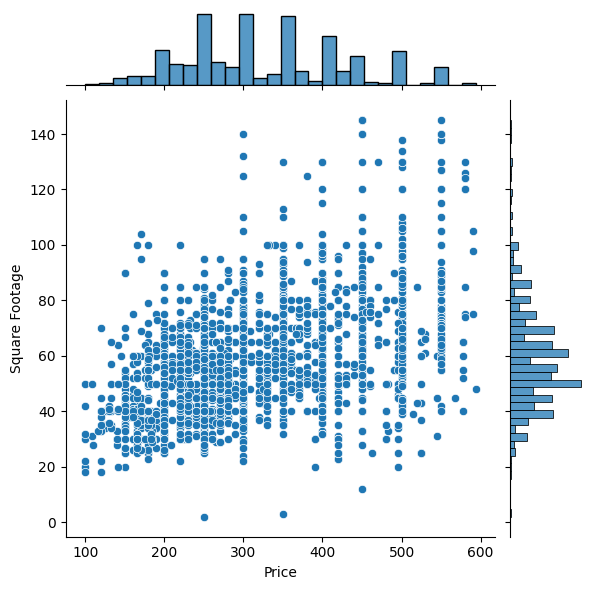

In [119]:
sns.jointplot(data = df1, x = 'Price', y = 'Square Footage')